In [1]:
import h5py
import tables
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#path = '/home/pietro/ctasoft/CTA/data/interp/proton/train/proton_20deg_180deg_runs1001-1010___cta-prod3-demo-2147m-LaPalma-baseline-mono_interp.h5'
path = '/mnt/Dati/CTA_DATA_EXT/interp/gamma_diff/gamma-diffuse_20deg_180deg_runs131-140___cta-prod3-demo-2147m-LaPalma-baseline-mono_interp.h5'
path1="/mnt/Dati/CTA_DATA_EXT/data/orig/gamma-diffuse_20deg_180deg_runs111-120___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5"
path2="/mnt/Dati/CTA_DATA_EXT/data/orig/gamma-diffuse_20deg_180deg_runs811-1000___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5"

In [3]:
data = tables.open_file(path)
data1 = tables.open_file(path1)
data2 = tables.open_file(path2)

In [4]:
data1

File(filename=/mnt/Dati/CTA_DATA_EXT/data/orig/gamma-diffuse_20deg_180deg_runs111-120___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Array_Information (Table(4,), shuffle, lzo(1)) 'Table of array/subarray information'
  description := {
  "id": UInt16Col(shape=(), dflt=0, pos=0),
  "type": StringCol(itemsize=20, shape=(), dflt=b'', pos=1),
  "x": Float32Col(shape=(), dflt=0.0, pos=2),
  "y": Float32Col(shape=(), dflt=0.0, pos=3),
  "z": Float32Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1927,)
/Events (Table(12198,), shuffle, lzo(1)) 'Table of Event Information'
  description := {
  "LST_LSTCam_indices": UInt32Col(shape=(4,), dflt=0, pos=0),
  "LST_LSTCam_multiplicity": UInt32Col(shape=(), dflt=0, pos=1),
  "alt": Float32Col(shape=(), dflt=0.0, pos=2),
  "az": Float32Col(shape=(), dflt=0.0, pos=

In [18]:
intensities = np.array([x for x in data.root.LST.intensities])
intensities_width_2 = np.array([x for x in data.root.LST.intensities_width_2])
mc_energy = [x for x in data.root.Event_Info.ei_mc_energy]
mc_energy1 = [x['mc_energy'] for x in data1.root.Events.iterrows()]
mc_energy2 = [x['mc_energy'] for x in data2.root.Events.iterrows()]
mc_energy+=mc_energy1+mc_energy2
len(mc_energy)

36735

In [6]:
bestia = np.array([intensities, intensities_width_2]).T
bestia

array([[1.06572604e+02, 5.43882430e-01],
       [1.22346067e+02, 9.03628528e-01],
       [1.17086883e+02, 4.36645538e-01],
       ...,
       [3.54340564e+02, 2.75973111e-01],
       [4.55701098e+01, 0.00000000e+00],
       [2.36714498e+02, 0.00000000e+00]])

In [7]:
len(bestia[(bestia[:,0]>50)&(bestia[:,1]<.2)])

12228

In [8]:
cut_intensities = intensities[(intensities > 50) & (intensities_width_2 < 0.2)]
len(cut_intensities)

12228

In [9]:
import matplotlib.pyplot as plt
import numpy as np

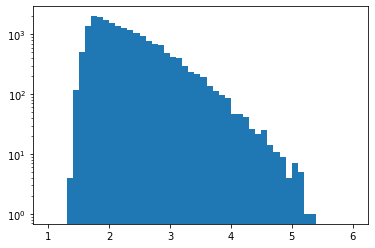

In [10]:
_ = plt.hist(np.log10(intensities), bins=50, log = True, range=(1,6))

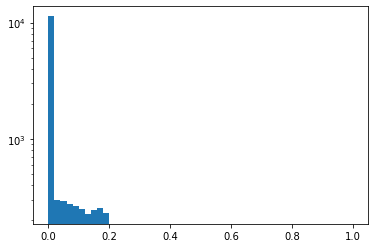

In [11]:
_1 = plt.hist(intensities_width_2[intensities_width_2 < 0.2], bins=50, log = True, range=(0,1))

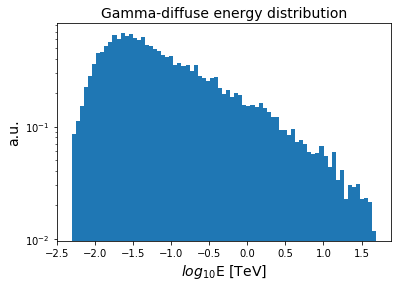

In [28]:
_2 = plt.hist(np.log10(mc_energy), bins=75, log = True, density=True)# range=[-2.5,2])
a = plt.xlabel("$log_{10}$E [TeV]", fontsize=14)
b = plt.ylabel("a.u.", fontsize=14)
t = plt.title("Gamma-diffuse energy distribution", fontsize=14)

In [13]:
path_org = '/home/pietro/ctasoft/CTA/data/orig/gamma-diffuse_20deg_180deg_runs111-120___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5'
data_org = tables.open_file(path_org)
print(data_org)

OSError: ``/home/pietro/ctasoft/CTA/data/orig/gamma-diffuse_20deg_180deg_runs111-120___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5`` does not exist

In [ ]:
org_einfo = data_org.root.Events
org_LST = data_org.root.LST_LSTCam 

In [ ]:
org_einfo

In [ ]:
org_energies = [x["mc_energy"] for x in org_einfo.iterrows()]
LSTCam_indices = [x["LST_LSTCam_indices"] for x in org_einfo.iterrows()]

In [ ]:
plt.hist(np.log10(org_energies), bins=100, log = True)

In [ ]:
values,bins,patches = plt.hist(intensities_width_2, bins = 100, density = True, log=True)

In [ ]:
len_bin = len(bins) -1
print(len_bin)

In [ ]:
area = sum(values[20:100])/sum(values)
print(area)